# Support Vector Regression

There are three different implementations of Support Vector Regression: 
SVR, NuSVR and LinearSVR. 

LinearSVR provides a faster implementation than SVR but only considers linear kernels, 
while NuSVR implements a slightly different formulation than SVR and LinearSVR. 

See Implementation details for further details.


In [5]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

## The Optimization Problem

$$
\begin{align}\begin{aligned}\min_ {w, b, \zeta, \zeta^*} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\\begin{split}\textrm {subject to } & y_i - (w^T \phi (x_i) + b) \leq \varepsilon + \zeta_i,\\
                      & (w^T \phi (x_i) + b) - y_i \leq \varepsilon + \zeta_i^*,\\
                      & \zeta_i, \zeta_i^* \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}
$$

where $\phi$ is the kernel map that can be chosen as 
 - linear: $\langle x, x'\rangle$
 - polynomial: $(\gamma \langle x, x'\rangle + r)^d$ where $\gamma,\, d ,\, r$ are specified by keyword gamma, degree and coef0 respectively.
 - rbf - radial basis function: $\exp(-\gamma \|x-x'\|^2)$
 - neural networks (sigmoid): $\tanh(\gamma \langle x,x'\rangle + r)$

In [6]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.svm import SVR
import numpy as np

regressor = SVR()
parameters = {'C': [0.1,1],
             'epsilon': [0.01,0.1,1],
             'gamma':['auto','scale'],
             'kernel': ['linear'],
             'degree': [2,3,4]
             }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 10) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=linear ........
[CV]  C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=linear, score=0.661, total=   0.0s
[CV] C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=linear ........
[CV]  C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=linear, score=0.702, total=   0.0s
[CV] C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=linear ........
[CV]  C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=linear, score=0.648, total=   0.0s
[CV] C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear .......
[CV]  C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear, score=0.661, total=   0.0s
[CV] C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear .......
[CV]  C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear, score=0.702, total=   0.0s
[CV] C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear .......
[CV]  C=0.1, degree=2, epsilon=0.01, gamma=scale, kerne

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, degree=2, epsilon=0.01, gamma=scale, kernel=linear, score=0.663, total=   0.0s
[CV] C=1, degree=2, epsilon=0.01, gamma=scale, kernel=linear .........
[CV]  C=1, degree=2, epsilon=0.01, gamma=scale, kernel=linear, score=0.730, total=   0.0s
[CV] C=1, degree=2, epsilon=0.01, gamma=scale, kernel=linear .........
[CV]  C=1, degree=2, epsilon=0.01, gamma=scale, kernel=linear, score=0.662, total=   0.0s
[CV] C=1, degree=2, epsilon=0.1, gamma=auto, kernel=linear ...........
[CV]  C=1, degree=2, epsilon=0.1, gamma=auto, kernel=linear, score=0.664, total=   0.0s
[CV] C=1, degree=2, epsilon=0.1, gamma=auto, kernel=linear ...........
[CV]  C=1, degree=2, epsilon=0.1, gamma=auto, kernel=linear, score=0.731, total=   0.0s
[CV] C=1, degree=2, epsilon=0.1, gamma=auto, kernel=linear ...........
[CV]  C=1, degree=2, epsilon=0.1, gamma=auto, kernel=linear, score=0.666, total=   0.0s
[CV] C=1, degree=2, epsilon=0.1, gamma=scale, kernel=linear ..........
[CV]  C=1, degree=2, epsilon=0.1, gamma=

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.4s finished


0.6652029637292804

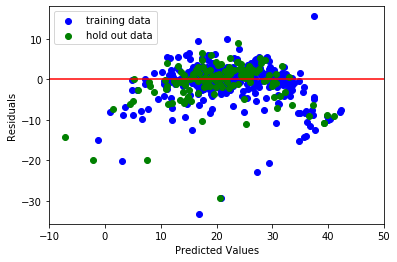

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [8]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  3.1558479448468626
MSE train:  25.595058204484797
RMSE train:  5.0591558786505875
r2:  0.8419053852907691
MAE test:  3.1283712619024313
MSE test:  24.94676355947878
RMSE test:  4.994673518807689
r2:  0.8155997570679386
